<a href="https://colab.research.google.com/github/syaifulaliyup/Prak_Meet3_Komputer_Grafis/blob/main/Perspektif2_Gbr_3D_g211230083.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

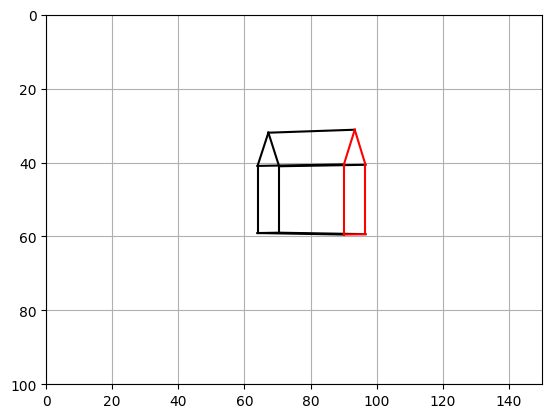

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from math import sin, cos, radians

plt.axis([0,150,100,0])

plt.axis('on')
plt.grid(True)

x=[-20,-20,20,20,-20,-20,20,20,-20,20] # -- object local corner coordinates
y=[-10,-10,-10,-10,10,10,10,10,-20,-20]
z=[5,-5,-5,5,5,-5,-5,5,0,0]

xc=30 # object center coordinates
yc=50
zc=10


xg=[ ] # object global coordinates
yg=[ ]
zg=[ ]

for i in np.arange(len(x)):
    xg.append(x[i]+xc)
    yg.append(y[i]+yc)
    zg.append(z[i]+zc)

# -- plot object
def plothouse(xg,yg,zg):
    plt.plot([xg[0],xg[3]],[yg[0],yg[3]],color='k')
    plt.plot([xg[1],xg[2]], [yg[1],yg[2]],color='k')

    plt.plot([xg[4],xg[7]], [yg[4],yg[7]],color='k')
    plt.plot([xg[5],xg[6]], [yg[5],yg[6]],color='k')
    plt.plot([xg[8],xg[9]],[yg[8],yg[9]],color='k')
    plt.plot([xg[4],xg[0]], [yg[4],yg[0]],color='k')
    plt.plot([xg[5],xg[1]], [yg[5],yg[1]],color='k')
    plt.plot([xg[6],xg[2]], [yg[6],yg[2]],color='r')
    plt.plot([xg[7],xg[3]],[yg[7],yg[3]],color='r')
    plt.plot([xg[0],xg[8]], [yg[0],yg[8]],color='k')
    plt.plot([xg[1],xg[8]],[yg[1],yg[8]],color='k')
    plt.plot([xg[2],xg[9]],[yg[2],yg[9]],color='r')
    plt.plot([xg[3],xg[9]],[yg[3],yg[9]],color='r')
    plt.plot([xg[4],xg[5]],[yg[4],yg[5]],color='k')
    plt.plot([xg[6],xg[7]], [yg[6],yg[7]],color='r')

# ----rotate object about the Y direction
def plothousey(xc,yc,zc,Ry):
    for i in range(len(x)): #-rotate 10 corners
        [xg[i],yg[i],zg[i]]=roty(xc,yc,zc,x[i],y[i],z[i],Ry)

def roty(xc,yc,zc,x,y,z,Ry):
    a=[x,y,z]
    b=[cos(Ry),0,sin(Ry)]
    xpp=np.inner(a,b)
    b=[0,1,0]
    ypp=np.inner(a,b)
    b=[-sin(Ry),0,cos(Ry)]
    zpp=np.inner(a,b)
    [xg,yg,zg]=[xpp+xc,ypp+yc,zpp+zc]
    return [xg,yg,zg]


# perspective transformation
def perspective(xfp,yfp,zfp):
    for i in range(len(x)):
        a=xg[i]-xfp
        b=yg[i]-yfp
        c=zg[i]+abs(zfp)
        q=np.sqrt(a*a+b*b+c*c)
        ux=a/q
        uy=b/q
        uz=c/q
        qh=q*abs(zfp)/(zg[i]+abs(zfp))
        xh=ux*qh+xfp
        yh=uy*qh+yfp
        zh=0
        xg[i]=xh
        yg[i]=yh
        zg[i]=zh

xfp=80 # focal point coordinates
yfp=50
zfp =-600

xc=80 # -redefine center coordinates
yc=50
zc=50


Ry=radians(45) # angle of rotation

plothousey(xc,yc,zc,Ry)   # -- rotate
perspective(xfp,yfp,zfp)  # -- transform
plothouse(xg,yg,zg)       # -- rotate

plt.show()




